In [1]:
from PIL import Image,ImageOps
import numpy as np
import math
import matplotlib.pyplot as plt
import PIL

In [23]:
data = r"../../data/all_data/10865-country style foods-smak mango nectar#1.png"

In [24]:
def get_image(path,new_width=256, new_height=256,show=False):
    im = Image.open(data)
    im = ImageOps.fit(im, (new_width, new_height), Image.ANTIALIAS)

    if show == True:
        im.show()
    image = np.array(im)
    return image

In [25]:
def generate_occlusion(image,center, filter_size=3):
    x,y=center
    startX = x - math.floor(filter_size/2)
    endX = x + math.floor(filter_size/2) 
    startY = y - math.floor(filter_size/2)
    endY = y + math.floor(filter_size/2) 
    new_img = image.copy()
    black_patch = np.zeros((filter_size,filter_size))
    new_img[startX:endX,startY:endY,:] = 0
    occluded_image = Image.fromarray(new_img)
    return occluded_image

In [26]:
def generated_occluded_images(image,filter_size=3,stride=1):
    occluded_images = []
    h,w,c = image.shape
#     print(image.shape)
    row_start = (math.floor(filter_size/2) + 1)%h
    row_end = (h - math.floor(filter_size/2) - 1)%h
    col_start = (math.floor(filter_size/2) + 1)%w
    col_end = (w - math.floor(filter_size/2) - 1)%w
#     print(row_start,row_end,col_start,col_end)
    print((row_end-row_start) * (col_end-col_start)/stride)
    for row_center in range(row_start,row_end,stride):
        for col_center in range(col_start,col_end,stride):
            print((row_center,col_center))
            occluded_image = generate_occlusion(image,(row_center,col_center),filter_size)
            meta_info = {
                "startX":(row_center - math.floor(filter_size/2)),
                "endX" : row_center + math.floor(filter_size/2) ,
                "startY" : col_center - math.floor(filter_size/2),
                "endY" : col_center + math.floor(filter_size/2) 
            }
            occluded_images.append({"meta":meta_info,"image":occluded_image})
    print(len(occluded_images))
    return occluded_images

In [ ]:
def generate_saliency_matrix(image,model,create_embedding,scoring_function,filter_size=100,stride=50):
    assert(image == PIL.Image.Image)
    h,w = image.size
    occluded_images_with_meta = generated_occluded_images(image,100,50)
    occluded_images = list(map(lambda x:x["image"],occluded_images_with_meta))
    targetEmbedding = model(image)
    SourceEmbeddingList = create_embedding(occluded_images)
    saliency_matrix = np.array((h,w))
    for embeddings in SourceEmbeddingList:
        try:
            inliers = scoring_function(targetEmbedding,embeddings)
            print(inliers)
        except:
            print("Exception has occured")

In [36]:
image = get_image(data)
img = generated_occluded_images(image,100,50)
img = list(map(lambda x:x["image"],img))

474.32
(51, 51)
(51, 101)
(51, 151)
(51, 201)
(101, 51)
(101, 101)
(101, 151)
(101, 201)
(151, 51)
(151, 101)
(151, 151)
(151, 201)
(201, 51)
(201, 101)
(201, 151)
(201, 201)
16


C:\Users\Datacore\AppData\Local\Temp\ipykernel_4108\2379658937.py:3: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im = ImageOps.fit(im, (new_width, new_height), Image.ANTIALIAS)


In [37]:
img[1:3]

[<PIL.Image.Image image mode=RGB size=256x256>,
 <PIL.Image.Image image mode=RGB size=256x256>]

In [38]:
img[0].save('pillow_imagedraw3.gif',save_all=True, append_images=img[1:], optimize=False, duration=40, loop=0)

In [39]:
assert(type(img[0]) == PIL.Image.Image)

In [21]:
img[0].size

(256, 256)

In [75]:
saliency_matrix = np.zeros((20,20,3))
    
      

In [76]:
saliency_matrix[2:4,4:8,:]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [22]:
sm = np.load("sm.npy")

In [100]:
def make_image(data, outputname, size=(1, 1), dpi=80):
    fig = plt.figure()
    fig.set_size_inches(size)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.set_cmap('hot')
    ax.imshow(data, aspect='equal')
    plt.savefig(outputname, dpi=dpi)

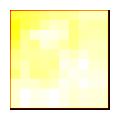

In [101]:

make_image(sm, 'out.png')

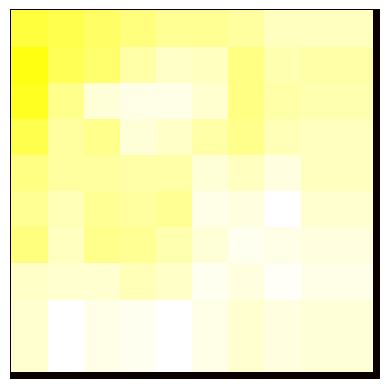

In [108]:
imgf = plt.imshow(sm, cmap='hot', interpolation='nearest')
imgf.set_cmap('hot')
plt.axis('off')
plt.savefig("test.png", bbox_inches='tight')

In [38]:
import matplotlib.pyplot as plt
from matplotlib import cm
import cv2
import seaborn as sns
im = Image.fromarray(np.uint8(sm))
im.save("pilout.png")

In [120]:
# plotimg = Image.open("../../data/all_data/1657518842216-unilever sri lanka ltd-fair - lovely advanced multi vitamin#3.png")
# plotimg = ImageOps.fit(plotimg, (256, 256), Image.ANTIALIAS)
# plotimg - np.asarray(plotimg)
plotimg = cv2.imread("../../data/all_data/1657518842216-unilever sri lanka ltd-fair - lovely advanced multi vitamin#3.png")
plotimg = cv2.resize(plotimg,(256,256))
heatmapplot = cv2.imread("./test.png")
heatmapplot = cv2.resize(heatmapplot,(256,256))


In [125]:
import time
timestr = time.strftime("%d-%H-%M-%S")
print(timestr + "Hello")

04-11-42-56Hello


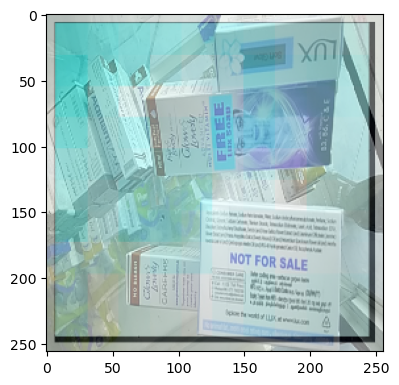

In [129]:
# colormap = 'plasma'
fig = plt.figure(figsize=(20,20))
ax2 = plt.subplot(1, 4, 3, aspect='equal')
ax2.imshow(plotimg, alpha = 1)
ax2.imshow(heatmapplot, alpha = 0.5)
plt.savefig("hello.png",bbox_inches='tight')

In [64]:
lst = []
for x in range(100):
    lst.append(np.exp(-x**0.1)+100)

In [145]:
import os
os.path.exists("./tmp/")

False

In [142]:
dt = "3.png"

In [143]:
dt[len(dt)%5:]

'3.png'